In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
data = pd.read_csv('SeoulBikeData.csv')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


O data.info() nos mostra que não há entradas nulas, então não há necessecidade de tratar dados faltantes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Em baixo irei retirar os dias onde Functioning Day = No, ou seja os dias em que não houve funcionamento do aluguél de bikes

In [5]:
sum(data[data['Functioning Day'] == 'No']['Rented Bike Count'])

0

In [6]:
data = data[data['Functioning Day'] == 'Yes']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature(�C)            8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature(�C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall (cm)              8465 non-null   float64
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
 13  Functioning Day            8465 non-null   objec

Os gráficos abaixo mostram que, os horários de maior procura estão bem definidos, e se mantem independente da estação. Até mesmo durante o inverno, onde há uma enorme redução dos alugueis, as 8 horas e as 18 horas continuam sendo os 2 principais horários de pico

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

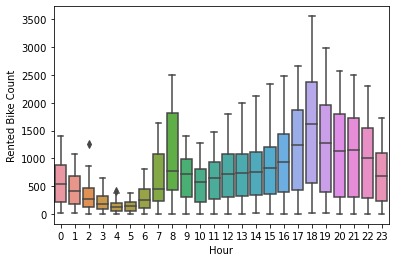

In [8]:
sns.boxplot(y=data['Rented Bike Count'],x=data['Hour'])

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

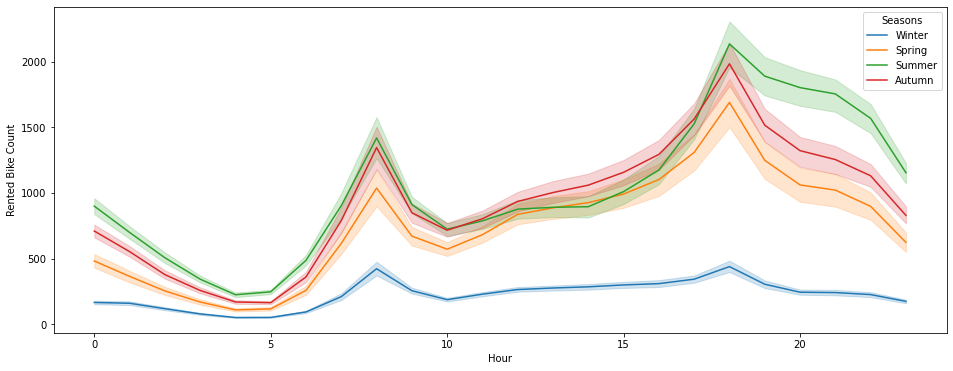

In [9]:
plt.figure(figsize=(16,6))
sns.lineplot(y=data['Rented Bike Count'],x=data['Hour'], hue=data['Seasons'])

Os seguintes gráficos confirmam a baixa procura durante o inverno, além de uma procura quase igual durante primavera e outono e a superioridade do verão

Além disso, há uma procura maior durante dias convencionais, e os picos de 8 e 18 horas se mantem, no entanto em feriados não há um pico de procura durante as 8 e sim uma procura quase constante a partir das 10

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

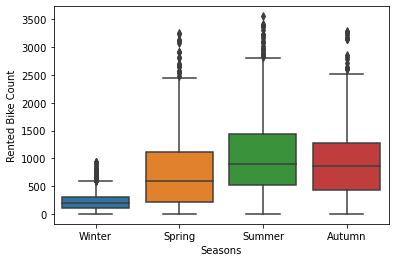

In [10]:
sns.boxplot(y=data['Rented Bike Count'],x=data['Seasons'])

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

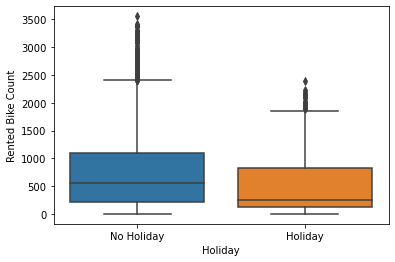

In [11]:
sns.boxplot(y=data['Rented Bike Count'],x=data['Holiday'])

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

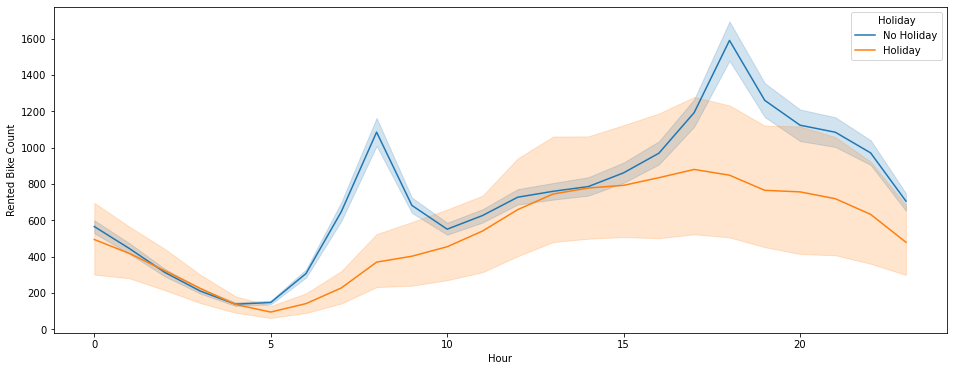

In [12]:
plt.figure(figsize=(16,6))
sns.lineplot(y=data['Rented Bike Count'],x=data['Hour'], hue=data['Holiday'])

Aqui vemos que as temperaturas durante a primavera e outono são bem próximas, o inverno é realmente frio e o verão realmente quente. E o gráfico de alugueis por temperatura reforça que, em dias mais quentes, há mais procura. O que não é nenhum absurdo visto que o verão é a estação de maior procura

<AxesSubplot:xlabel='Seasons', ylabel='Temperature(�C)'>

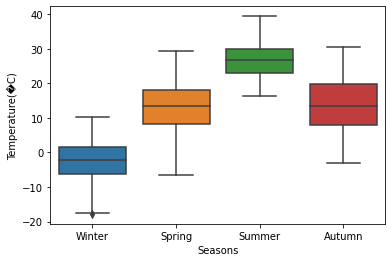

In [13]:
sns.boxplot(y=data['Temperature(�C)'],x=data['Seasons'])

<AxesSubplot:xlabel='Temperature(�C)', ylabel='Rented Bike Count'>

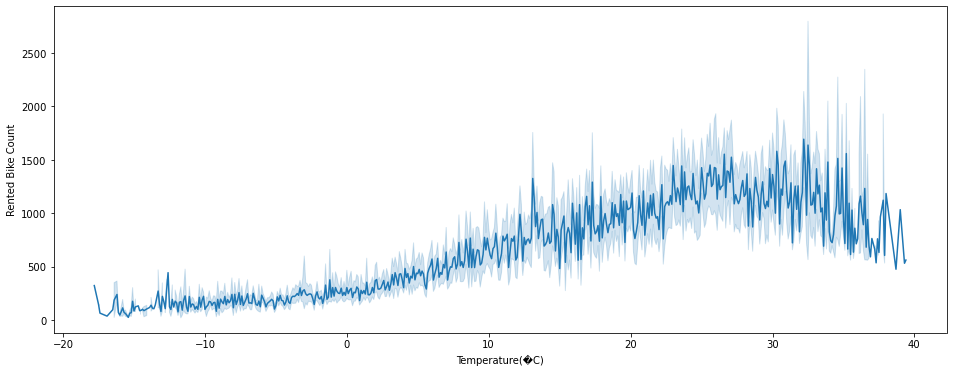

In [14]:
plt.figure(figsize=(16,6))
sns.lineplot(y=data['Rented Bike Count'],x=data['Temperature(�C)'])

A seguir analiso a relação do aluguel com chuva, neve e humidade.

Dias com chuva implicam em uma menor procura

Dias com neve implicam em uma menor procura, algo que ja era esperado pois esse fenômeno ocorre durante o inverno

E humidades muito altas, ou muito baixa implicam em uma menor procura

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

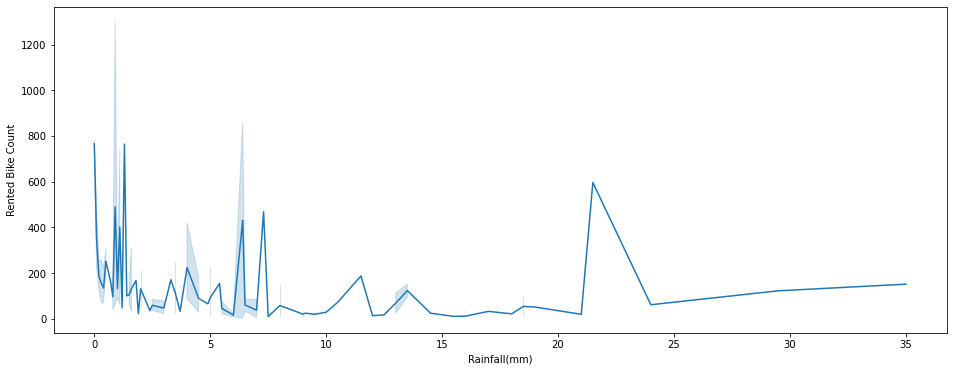

In [15]:
plt.figure(figsize=(16,6))
sns.lineplot(y=data['Rented Bike Count'],x=data['Rainfall(mm)'])

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

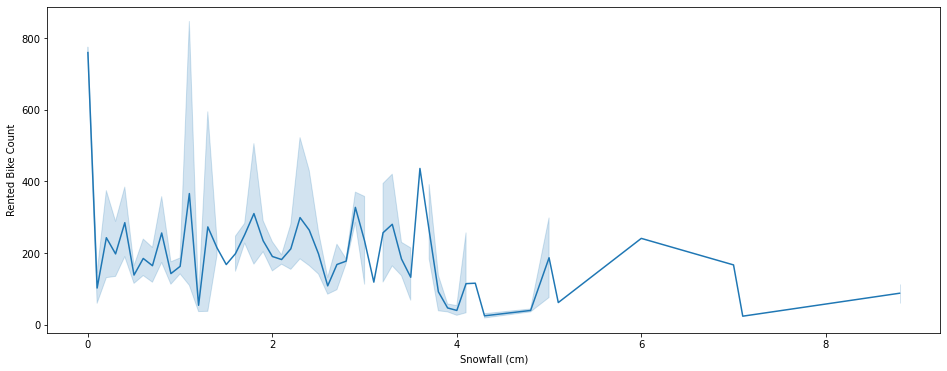

In [16]:
plt.figure(figsize=(16,6))
sns.lineplot(y=data['Rented Bike Count'],x=data['Snowfall (cm)'])

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

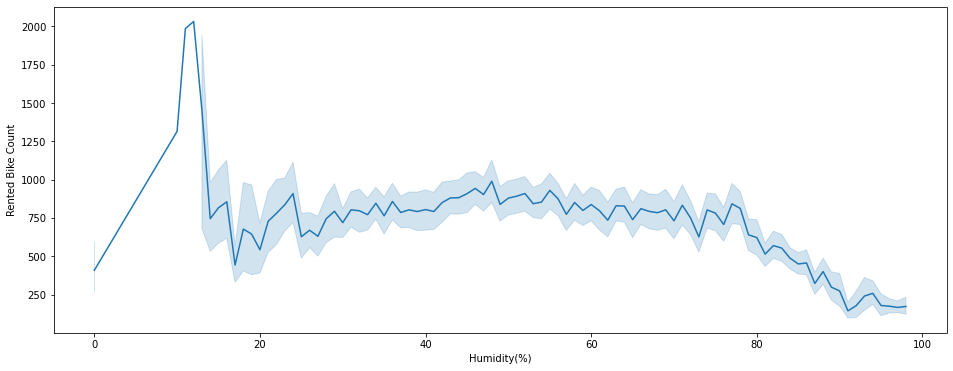

In [17]:
plt.figure(figsize=(16,6))
sns.lineplot(y=data['Rented Bike Count'],x=data['Humidity(%)'])

In [18]:
#Média de alugueis em dias chuvosos
sum(data[data['Rainfall(mm)'] != 0]['Rented Bike Count'])/len(data[data['Rainfall(mm)'] != 0])

167.2577519379845

In [19]:
#Média de alugueis em dias sem chuva
sum(data[data['Rainfall(mm)'] == 0]['Rented Bike Count'])/len(data[data['Rainfall(mm)'] == 0])

765.6320291860611

Com essa análise podemos inferir que os principais fatores para os alugueis são a temperatura, a hora do dia, a humidade, o indicie de chuva e neve, além dos feriados

Dew point temperature é um reflexo da temperatura, Solar Radiation também

As estações influenciam bastante, pois os dados climáticos são um reflexo disso.

# Começo agora as preparações para o modelo preditivo #

In [20]:
def RMSLE(y_true:np.ndarray, y_pred:np.ndarray) -> np.float64:
    """
        The Root Mean Squared Log Error (RMSLE) metric 
        
        :param y_true: The ground truth labels given in the dataset
        :param y_pred: Our predictions
        :return: The RMSLE score
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [21]:
data_ml = data.copy()

Crio transformo os dados de estação e feriados de strings para inteiros, para serem utilizados no modelo

In [22]:
season_dummie = pd.get_dummies(data_ml['Seasons'])

In [23]:
data_ml = pd.concat([data_ml, season_dummie], axis=1)

In [24]:
data_ml['Holiday'] = pd.get_dummies(data_ml['Holiday'], drop_first=True)

In [25]:
data_ml.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,Yes,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,Yes,0,0,0,1


Agora separo o dataset em 4, cada um representando uma estação e removo os outliars de cada um e posteriormente junto eles novamente

In [26]:
X_ver = data_ml[data_ml['Summer'] == 1]
X_inv = data_ml[data_ml['Winter'] == 1]
X_pri = data_ml[data_ml['Spring'] == 1]
X_out = data_ml[data_ml['Autumn'] == 1]

In [27]:
def out_rem(dataset, column):
    """Remove dados acima do quantil 0.95 e abaixo do quantil 0.05 e retorna o novo dataset"""
    max_tresh = dataset[column].quantile(0.95)
    min_tresh = dataset[column].quantile(0.05)
    df = dataset[(dataset[column] < max_tresh) & (dataset[column] > min_tresh)]
    return df

In [28]:
print(X_ver.shape) #Antes da remoção

(2208, 18)


In [29]:
X_ver = out_rem(X_ver,'Rented Bike Count')
X_inv = out_rem(X_inv,'Rented Bike Count')
X_pri = out_rem(X_pri,'Rented Bike Count')
X_out = out_rem(X_out,'Rented Bike Count')

In [30]:
print(X_ver.shape) #Depois da remoção

(1986, 18)


In [31]:
data_clean = pd.concat([X_ver, X_inv, X_pri, X_out], axis=0) #Junto os 4 datasets limpos

O Boxplot abaixo, quando comparado com o primeiro feito lá em cima confirma que os outliars foram retirados

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

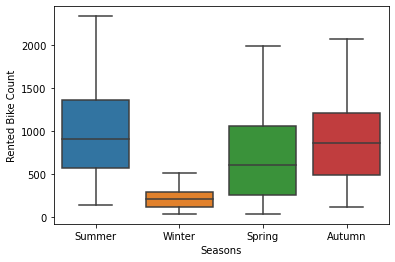

In [32]:
sns.boxplot(y=data_clean['Rented Bike Count'],x=data_clean['Seasons'])

Retiro agora os dados que não utilizarei no modelo, como a data, o 'Dew point temperature(�C)' que é um reflexo da temperatura, 'Functioning Day', Seasons pois já foi transformada com get_dummies, e 'Winter' pois as colunas Autumn, Spring e Summer já são suficientes para identificação, logo quando não é nenhuma dessas, só pode ser Winter.

In [33]:
data_clean = data_clean.drop(['Functioning Day', 'Date','Winter','Dew point temperature(�C)', 'Seasons'], axis=1)
data_clean

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer
4368,963,0,20.1,63,1.1,1698,0.0,0.0,0.0,1,0,0,1
4369,776,1,19.5,65,0.4,1662,0.0,0.0,0.0,1,0,0,1
4370,554,2,19.0,72,1.4,1258,0.0,0.0,0.0,1,0,0,1
4371,366,3,18.6,72,1.4,1340,0.0,0.0,0.0,1,0,0,1
4372,265,4,18.1,76,1.8,561,0.0,0.0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,1,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,1,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,1,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,1,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.drop(['Rented Bike Count'], axis=1), data_clean['Rented Bike Count'], random_state=171, test_size=0.4)

Escolhi dois modelos de Regressão, RandomForestRegressor e LinearRegression

In [35]:
ml_forest = RandomForestRegressor()

In [36]:
norm_train = np.log1p(y_train) #Escrevendo os valores como ln(1+x) para reduzir erros
norm_test = np.log1p(y_test)

In [37]:
ml_forest.fit(X_train,norm_train)

RandomForestRegressor()

In [38]:
pred = ml_forest.predict(X_test)

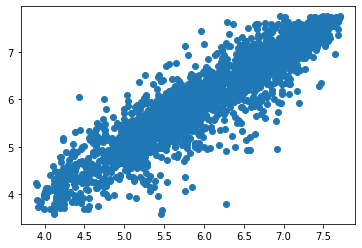

In [39]:
plt.scatter(pred,norm_test) #Normalizado

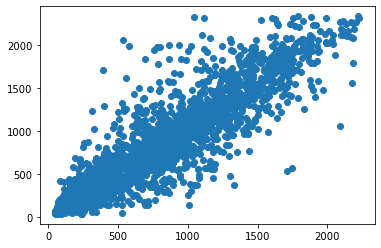

In [40]:
plt.scatter(np.e**(pred)-1,y_test) #Real

In [41]:
#Valores normalizados na escala log
print(np.mean(abs(pred-norm_test)), ':Erro Absoluto')
print(np.mean(abs(pred-norm_test)/norm_test),':Erro Relativo')
print(max(norm_test),max(pred), ':Maximos normalizado,modelo')
print(min(norm_test),min(pred), ':Mínimos normalizado,modelo')
print(RMSLE(norm_test,pred), ':RMSLE')

0.2440383113992241 :Erro Absoluto
0.04241624611888931 :Erro Relativo
7.757051142032013 7.709644926012421 :Maximos normalizado,modelo
3.58351893845611 3.889319749552111 :Mínimos normalizado,modelo
0.05274078682823668 :RMSLE


In [42]:
#Valores Reais
print(np.mean(abs(np.e**(pred) -1 -y_test)), ':Erro Absoluto')
print(np.mean(abs(np.e**(pred) -1 -y_test)/y_test),':Erro Relativo')
print(max(y_test),',',max(np.e**(pred)-1), ':Maximos real,modelo')
print(min(y_test),',',min(np.e**(pred)-1), ':Mínimos real,modelo')
print(RMSLE(y_test,np.e**(pred)-1), ':RMSLE')

137.48818142756298 :Erro Absoluto
0.27018491669622297 :Erro Relativo
2337 , 2228.75039124558 :Maximos real,modelo
35 , 47.87762618523011 :Mínimos real,modelo
0.350497084128762 :RMSLE


In [43]:
lin_ml = LinearRegression()

In [44]:
lin_ml.fit(X_train,norm_train)

LinearRegression()

In [45]:
lin_pred = lin_ml.predict(X_test)

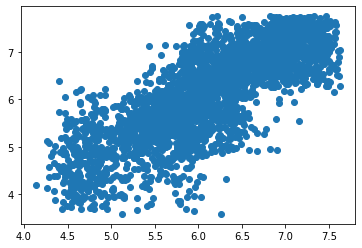

In [46]:
plt.scatter(lin_pred,norm_test)#Normalizado

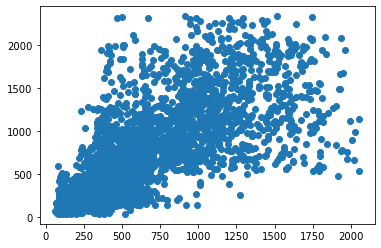

In [47]:
plt.scatter(np.e**(lin_pred)-1,y_test)#Real

In [48]:
#Valores normalizados na escala log
print(np.mean(abs(lin_pred-norm_test)), ':Erro Absoluto')
print(np.mean(abs(lin_pred-norm_test)/norm_test),':Erro Relativo')
print(max(norm_test),max(lin_pred), ':Maximos real,modelo')
print(min(norm_test),min(lin_pred), ':Mínimos real,modelo')
print(RMSLE(norm_test,lin_pred), ':RMSLE')

0.44333620427606674 :Erro Absoluto
0.07651436480389011 :Erro Relativo
7.757051142032013 7.627888514725992 :Maximos real,modelo
3.58351893845611 4.135270024857929 :Mínimos real,modelo
0.08530751606228922 :RMSLE


In [49]:
#Valores reais
print(np.mean(abs(np.e**(lin_pred) -1 -y_test)), ':Erro Absoluto')
print(np.mean(abs(np.e**(lin_pred) -1 -y_test)/y_test),':Erro Relativo')
print(max(y_test),',',max(np.e**(lin_pred)-1), ':Maximos real,modelo')
print(min(y_test),',',min(np.e**(lin_pred)-1), ':Mínimos real,modelo')
print(RMSLE(y_test,np.e**(lin_pred)-1), ':RMSLE')

262.711717119995 :Erro Absoluto
0.5236027739355604 :Erro Relativo
2337 , 2053.7069528166235 :Maximos real,modelo
35 , 61.506467091786455 :Mínimos real,modelo
0.5752131195224154 :RMSLE


# Conclusão #

O verão é a principal estação para o aluguel, e o inverno é a pior.

Dias de chuva, neve e feriados causam um impacto negativo nos alugueis.

O principal horário de procura é as 18 horas, seguido das 8 e por final 17,19, que estão ao redor das 18, execeto no inverno, onde o horário de pico é as 8.

Por final o modelo de  RandomForestRegressor teve uma boa performance, com um erro relativo médio real de 27%, e um gráfico quase linear entre os dados de teste e os dados preditos

Já o LinearRegression não teve uma performance agradável
